# Week 4: Subspace Clustering and projected clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1: Theoretical questions

1. Why is traditional clustering ill-suited for high dimensional data?
1. What is the goal of subspace clustering and projected clustering?
1. Why is exhaustive subspace cluster search infeasible in practice?
1. Give a definition of what a subspace cluster is according to the models proposed by Subclu, Clique and Proclus. How are they similar and where do they differ?


1. Curse of dimensionality. Meaningful clusters cannot be detected as distances are increasingly for growing dimensionality.
1. The goal is to find subspaces, where meaningful clusters can be identified.<br> 
Subspace clustering algorithms aim at finding all clusters in all subspaces of the entire feature space.<br>
Projecting Clustering: the goal is to identify “correct” projection for each object by <br>
• starting from full space, projection to subspaces of
lower dimensionality reveals clusters<br>
• Top-down instead of bottom-up<br>
Difference: As opposed to subspace clustering, each object is assigned
to exactly one cluster (some approaches also allow a noise
“cluster”)
1. Because we usually do it for high-dimensional (say $d$ dimensions), which would require us to run a clustering algorithm in $\sim 2^d$ different subspaces.
1. **SubClu:** subset of dimensions and the clusters in those dimensions. <br>**Clique**: rectangular boxes that are connected and all dense.<br>**Proclus**: Planes to project the points onto. 

## Exercise 2: CLIQUE
1. What is a subspace cluster in CLIQUE?
1. How is monotonicity used in CLIQUE?
1. Use the CLIQUE algorithm to compute the hidden subspace clusters in the following 6 dimensional data set.
    Compute the first step of the CLIQUE algorithm to detect dense cells. Use 3 equal intervals
    per dimension in the domain 0...100 (number of intervals $\xi = 3$) and consider a cell as dense
    if it contains at least 5 objects (density threshold $\tau = 21\%$).
   

**Answer**
1. It's subspace defined by grid based approach wirh density threshold $\tau$
1. A region $r$ dense in $k$-dimensional spase $s$, then any projection of $r$ into a $(k-1)$-dimensional subspace $s$ is dense.

In [2]:
# Dim1 Dim2 Dim3 Dim4 Dim5 Dim6
X = np.array([
    [6, 23, 22, 21, 31, 49],
    [7, 22, 21, 20, 51, 76],
    [26, 85, 75, 52, 53, 50],
    [28, 94, 76, 63, 76, 87],
    [29, 45, 93, 51, 54, 51],
    [35, 73, 76, 51, 52, 50],
    [38, 23, 22, 21, 33, 61],
    [41, 22, 21, 21, 32, 99],
    [56, 15, 66, 39, 36, 66],
    [58, 1, 14, 53, 52, 51],
    [66, 1, 40, 19, 86, 13],
    [70, 90, 25, 32, 70, 65],
    [71, 23, 21, 20, 3, 81],
    [80, 19, 42, 23, 57, 1],
    [82, 80, 6, 54, 81, 81],
    [82, 81, 38, 35, 81, 82],
    [82, 81, 77, 57, 81, 82],
    [82, 83, 44, 59, 81, 83],
    [82, 81, 35, 86, 81, 81],
    [84, 80, 66, 10, 81, 81],
    [86, 33, 59, 51, 54, 50],
    [89, 34, 36, 53, 54, 51],
    [92, 25, 27, 40, 14, 22]
])

23 6
Clusters [{'dim': 0, 'clusters': [(66, 99)]}, {'dim': 1, 'clusters': [(0, 33), (66, 99)]}, {'dim': 2, 'clusters': [(0, 66)]}, {'dim': 3, 'clusters': [(0, 66)]}, {'dim': 4, 'clusters': [(33, 99)]}, {'dim': 5, 'clusters': [(33, 99)]}]


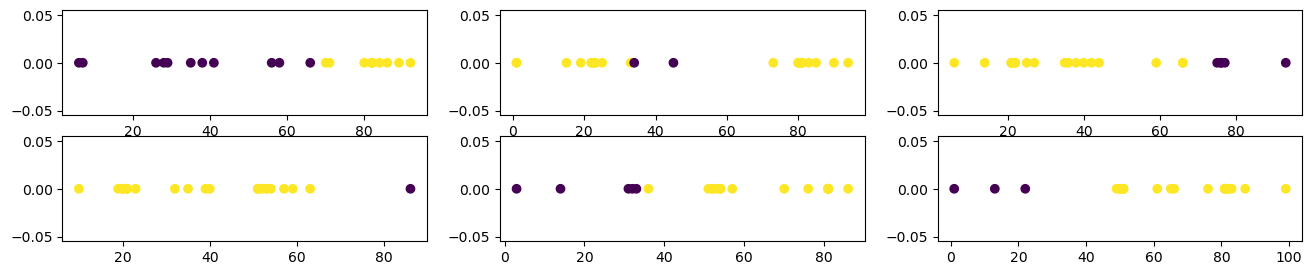

In [3]:
n, d = X.shape
print(n, d)
starts = range(0, 100, 100 // 3)
tau = 8

clusters = []
for i in range(d):
    X_ = X[:,i]
    dense_regions = []
    for start in starts:
        cnt = ((X_ > start) * (X_ <= start + 100 // 3)).sum()
        if cnt > tau:
            dense_regions.append((start, start + 100//3))
        
    # Stupid but simple way to choose the three clusters.
    clust = []
    if len(dense_regions) == 0: continue
    if len(dense_regions) == 1: clust.append(dense_regions[0]) 
    if len(dense_regions) == 2:
        if dense_regions[0][1] == dense_regions[1][0]: 
            clust.append((dense_regions[0][0], dense_regions[1][1]))
        else:
            clust.append(dense_regions[0])
            clust.append(dense_regions[1])
    if len(dense_regions) == 3:
        clust.append((dense_regions[0][0], dense_regions[2][1]))
    
    clusters.append({'dim': i, 'clusters': clust})

print('Clusters', clusters)
fig, ax = plt.subplots(2, 3, figsize=(16, 3))
for i in range(2):
    for j in range(3):
        c = clusters[i*3 + j]
        dim = c['dim']
        cl = c['clusters']
        X_ = X[:,dim]
        y = np.zeros((n,))
        for cs in cl: y[((X_>cs[0]) * (X_<=cs[1]))==1] = 1
        ax[i, j].scatter(X_, np.zeros((n,)), c=y)

## Exercise 3: PROCLUS

Consider the following four-dimensional data set:

In [4]:
X = np.array([
    ( 15 , 12 , 16 ,  9 ),  # A
    ( 14 , 13 , 18 ,  3 ),  # B
    ( 12 , 14 , 14 , 15 ),  # C 
    ( 16 , 13 , 19 , 19 ),  # D 
    (  5 ,  6 ,  9 ,  4 ),  # E 
    (  4 , 11 , 10 , 18 ),  # F 
    (  6 , 17 ,  8 , 13 ),  # G 
    (  6 ,  9 , 14 , 16 ),  # H 
    ( 14 , 19 , 13 , 15 ),  # I 
    ( 19 ,  3 , 15 , 14 ),  # J 
])

Calculate the following steps of a PROCLUS clustering using $k=3$ clusters. 
Please use the complete data set in the Algorithm (no sample; $A=\frac{10}{3}$).

1. Compute a set of four medoids M.
1. Use the first three medoids and compute the locality and $Z_{ij}$ values for each medoid.
1. Determine the optimal dimension set $D_i$ for each medoid $m_i$ (use $l=3$).

In [5]:
np.random.seed(0)
n, d = X.shape
k = 3
A = 10 / 3.
B =  4 / 3.
l = 3

M = [np.random.randint(0, X.shape[0])]
print('M = ',M)
L1 = lambda x, y: np.sum(np.abs(x-y))

while len(M) < k * B:
    dists = [0 if i in M else min([L1(X[i], X[j]) for j in M]) for i in range(n)]
    next_idx = np.argmax(dists)
    M.append(next_idx)

M  = np.array(M)
Ms = X[M]
print("1. Selected medoids, indexes in X and vectors:")
print(M)
print(Ms)

# 2. compute Zijs
Z = np.zeros((3, d))
for i, m in enumerate(Ms[:3]):
    delta = min([L1(m, m_) for j, m_ in enumerate(Ms) if not i == j])
    Li = np.array([x for x in X if L1(m, x) <= delta])
    Xij = np.abs(m-Li).mean(axis=0)
    Yi = np.mean(Xij)
    std = np.sqrt(((Xij-Yi)**2 / (d-1)).sum())
    Zij = (Xij - Yi) / std
    Z[i] = Zij

print("\n2. Zijs for the first three medoids")
print(Z)

# 3. Determine optimal dimensions
dims = []
for i in range(3):
    ordered_idxs = np.argsort(Z[i])
    first_dims = list(ordered_idxs[:2])
    dims.append(first_dims)
    Z[i,first_dims[0]] = 20 # Some high value such that the dimension will not be chosen again
    Z[i,first_dims[1]] = 20 # Some high value such that the dimension will not be chosen again
    
print("\n3. Identifying dimensions")
print("Dimensions after assigning the two best dimensions to each medoid.")
print(dims)
missing_dims = k * (l-2)
print("Need to another %i dimensions to have l * k dimensions in total" % missing_dims)

Z_flat = Z.reshape(-1)
ordered_idxs = np.argsort(Z_flat)
for idx in ordered_idxs[:missing_dims]:
    i, j = idx // 4, idx % 4
    dims[i].append(j)

print("Chosen dimensions for the first three medoids")
print(dims)

M =  [5]
1. Selected medoids, indexes in X and vectors:
[5 1 9 8]
[[ 4 11 10 18]
 [14 13 18  3]
 [19  3 15 14]
 [14 19 13 15]]

2. Zijs for the first three medoids
[[ 1.37281295 -0.39223227 -0.98058068  0.        ]
 [-0.66927828 -0.51180103 -0.30183138  1.48291069]
 [ 0.26899507  1.29373818 -0.90945951 -0.65327373]]

3. Identifying dimensions
Dimensions after assigning the two best dimensions to each medoid.
[[2, 1], [0, 1], [2, 3]]
Need to another 3 dimensions to have l * k dimensions in total
Chosen dimensions for the first three medoids
[[2, 1, 3], [0, 1, 2], [2, 3, 0]]


## Exercise 4: OPTICS 
Draw the OPTICS plot for the following 2-d data set using Manhattan distance, $minpts=6$, $\epsilon = 2$. 
Start with $o = (0,4)$, then, once the ControlList is empty, restart with $p = (2,0)$.

In [6]:
X = np.array([ 
    (2,0),(2,0),(3,0),(3,0),(3,0),(3,0),(4,0),(4,0),(3,1),(3,1),(3,1),
    (4,1),(4,1),(4,1),(0,4),(0,4),(0,5),(0,5),(1,4),(1,4),(1,5),(1,5),
    (2,4),(3,4),(3,4),(3,5),(3,5),(3,5),(4,4),(4,4),(4,5),(4,5),(4,5)
])


![](graphics/W4.Q5.png)

Note: you do not need to do the
actual computation, but you may
refer to the figure for reading off
the reachability and core distances,
respectively.
Given the resulting OPTICS plot, which two settings $\epsilon=1,2$ correspond to a DBSCAN that outputs
two and three clusters, respectively?

(33,)


<BarContainer object of 33 artists>

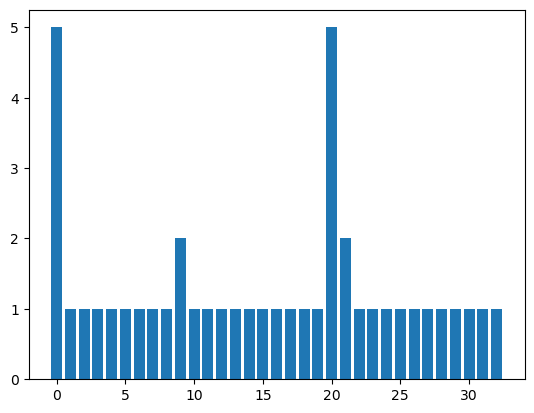

In [7]:
n, d = X.shape
reachabilty_dists = np.array([5, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
print(reachabilty_dists.shape)

fig, ax = plt.subplots(1,1)
ax.bar(np.arange(n), reachabilty_dists)

In [8]:
from sklearn.cluster import DBSCAN
import numpy as np
clustering = DBSCAN(eps=1, min_samples=6).fit(X)
print(clustering.labels_)
clustering = DBSCAN(eps=2, min_samples=6).fit(X)
print(clustering.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


## Exercise 5: BIRCH/CF-Tree
Insert the following points into an empty CF-Tree and compute the micro clusters and associated cluster features  (use the diameter D = 2R).

1. $P_1=(5,5)$ 
1. $P_2=(2,2)$
1. $P_3=(4,5)$
1. $P_4=(1,4)$
1. $P_5=(2,1)$.

The tree parameters are: $B=2$, $L=2$, $T=2$

<img src="graphics/formulas.png" width="1000"/>

In [9]:
def radius(N1, N2, LS1, LS2, SS1, SS2):
    tmp = ( (SS1 + SS2)/(N1 + N2) - (LS1+LS2).T @ (LS1 + LS2)/(N1 + N2)**2 )
    return np.sqrt(tmp)

def diameter(N1, N2, LS1, LS2, SS1, SS2):
    return 2*radius(N1, N2, LS1, LS2, SS1, SS2)

def cf(X):
    return X.shape[0], X.sum(0), (X**2).sum()

def d(X1, X2):
    N1, LS1, SS1 = cf(X1)
    N2, LS2, SS2 = cf(X2)
    return diameter(N1, N2, LS1, LS2, SS1, SS2)

# 2
print("\n", " - " * 3, "Step 2" , " - " * 3)
X1 = np.array([[5,5],])
X2 = np.array([[2,2],])
print("s2: Diameter: ", d(X1, X2))

# 3
print("\n", " - " * 3, "Step 3" , " - " * 3)
X3 = np.array([[4,5]])
print("s3: Diameter: ", d(X1, X3))
X1 = np.concatenate([X1, X3], axis=0)
print(X1.sum(0), (X1**2).sum())

# 4
print("\n", " - " * 3, "Step 4" , " - " * 3)
X3 = np.array([[1,4]])
def dist(X1, X2):
    N1, LS1, SS1 = cf(X1)
    N2, LS2, SS2 = cf(X2)
    m1 = LS1 / N1
    m2 = LS2 / N2
    diff = m1 - m2
    return np.sqrt(np.dot(diff, diff))
     
print("Dist 1:", dist(X1, X3))
print("Dist 2:", dist(X2, X3))

print("s4: Diameter: ", d(X2, X3))

print("Total stats", cf(np.concatenate([X1, X2, X3], 0)))

X1 = np.concatenate([X2, X3], axis=0)
print(X1.sum(0), (X2**2).sum())


# 5
print("\n", " - " * 3, "Step 5" , " - " * 3)
X4 = np.array([[2,1]])

root1 = np.concatenate([X1, X2], axis=0)
root2 = X3

print("Dist 1:", dist(root1, X4))
print("Dist 2:", dist(root2, X4))

print("Dist 1.1:", dist(X1, X4))
print("Dist 1.2:", dist(X2, X4))

print("Diameter: ", d(X2, X4))
print(cf(np.concatenate([X2, X4], axis=0)))


  -  -  -  Step 2  -  -  - 
s2: Diameter:  4.242640687119285

  -  -  -  Step 3  -  -  - 
s3: Diameter:  1.0
[ 9 10] 91

  -  -  -  Step 4  -  -  - 
Dist 1: 3.640054944640259
Dist 2: 2.23606797749979
s4: Diameter:  2.23606797749979
Total stats (4, array([12, 16]), 116)
[3 6] 8

  -  -  -  Step 5  -  -  - 
Dist 1: 1.6996731711975948
Dist 2: 3.1622776601683795
Dist 1.1: 2.0615528128088303
Dist 1.2: 1.0
Diameter:  1.0
(2, array([4, 3]), 13)


**Step 1:**
$C_1 = \{P_1\}$ with $N_1 = 1$, $LS_1 = (5,5)$, and $SS_1 = 50$.

**Step 2:**
Diameter of $C_1$ will be 4.24 if we add $P_2$ to $C_1$, so we don't.
We add $P_2$ to new cluster $C_2$. Now we have a leaf node with two micro clusters

$$CF_1 = (1, [5,5], 50)$$
$$CF_2 = (1, [2,2], 8)$$

**Step 3:**
Point $(4,5)$ is closest to cluster $C_1$, so add the point there.
The diameter becomes 1, so the point will stay there

$$CF_1 = (2, [9,10], 91)$$
$$CF_2 = (1, [2,2], 8)$$

**Step 4:**
Point $P_4 = (1, 4)$ is closest to $C_2$, so we add the point there.
The diameter becomes 2.24, which is too large so we split.

But now the leaf is overfull, so we split the leaf

$$C_{root} = [(CF_1 + CF2), CF3] = [(3, [11, 12], 99), (1, [1, 4], 17)]$$
$$CF_1 = (2, [9, 10], 91)$$
$$CF_2 = (1, [2, 2] , 8)$$
$$CF_3 = (1, [1, 4], 17)$$

**Step 5:**
At root, we choose the first CF and at leaf, we choose $CF_2$ with dist 1.
Diameter of $CF_2$ becomes one, when adding $P_5$, so that is fint. We end up with
the following tree

$$C_{root} = [(CF_1 + CF2), CF3] = [(3, [12, 14], 104), (1, [1, 4], 17)]$$
$$CF_1 = (2, [9, 10], 91)$$
$$CF_2 = (2, [4, 3] , 13)$$
$$CF_3 = (1, [1, 4], 17)$$



# Optional Exercises

## Exercise 6: SUBCLU
1. What is a subspace cluster in SUBCLU?
1. How is the monotonicity used in SUBCLU?

**Answer**
1. It's subspace is defined by density reachability and connectivity defined from core point.
1. It's obey monotonicity of density connectivity. If two points are density-connected in $k$-dimensional spase $s$, all their projections on $(k-1)$-dimensional subspace also density-connected.

## Exercise 7: Proving Property of BIRCH 
In BIRCH [1], they claim that the the _average intra-cluster distance_ $D3$ can be computed efficiently and exactly from the clustering feature (CF) of two clusters. 
We aim to prove that claim here.

The average intra-cluster distance is defined as follows. 
Given $N_1$ d-dimensional data points in cluster: $C_1 = \{ X_i \}$ where $i = 1, \dots, N_1$, and $N_2$ datapoints in another cluster: $C_2 = \{ X_j \}$ where $j = N_1 + 1, \dots, N_1 + N_2$, 

$$
D3(C1, C2) =\left(\frac{\sum_{i=1}^{N_{1}+N_{2}} \sum_{j=1}^{N_{1}+N_{2}}\left(X_{i}-X_{j}\right)^{2}}{\left(N_{1}+N_{2}\right)\left(N_{1}+N_{2}-1\right)}\right)^{\frac{1}{2}} \qquad\quad\quad (1)
$$

and the CF for cluster $i$ is defined as a triple $CF_i = (N_i, LS_i, SS_i)$, where $LS_i = \sum_{j=1}^{N_i} X_j$ and $SS_i = \sum_{j=1}^{N_i} X_j^2$.

1. Given two CFs, $CF_1$ and $CF_2$, for clusters $C_1$ and $C_2$, respectively, show that $D3(C_1, C_2)$ can becomputed only from information in $CF_1$ and $CF_2$.
2. Compare the running times of Equation (1) and you derived algorithm. Which one is faster?

<img src="graphics/W4.Q6.proof.png" width="500"/>

If you want, you could test your derived formula here. Look for the _TODO_ below.

Testing slow algorithm
Size 10: 	0.000033 secs.
Size 110: 	0.001685 secs.
Size 210: 	0.005968 secs.
Size 310: 	0.013299 secs.
Size 410: 	0.022913 secs.
Size 510: 	0.035432 secs.
Size 610: 	0.050742 secs.
Size 710: 	0.068691 secs.
Size 810: 	0.092356 secs.
Size 910: 	0.113440 secs.
Size 1010: 	0.139181 secs.
Testing fast algorithm
Size 10: 	0.000026 secs.
Size 110: 	0.000025 secs.
Size 210: 	0.000027 secs.
Size 310: 	0.000030 secs.
Size 410: 	0.000031 secs.
Size 510: 	0.000033 secs.
Size 610: 	0.000035 secs.
Size 710: 	0.000037 secs.
Size 810: 	0.000039 secs.
Size 910: 	0.000042 secs.
Size 1010: 	0.000043 secs.

|  i  | Fast      | Slow      |
-------------------------------
|  10 |   0.00003 |   0.00003 |
| 110 |   0.00002 |   0.00169 |
| 210 |   0.00003 |   0.00597 |
| 310 |   0.00003 |   0.01330 |
| 410 |   0.00003 |   0.02291 |
| 510 |   0.00003 |   0.03543 |
| 610 |   0.00004 |   0.05074 |
| 710 |   0.00004 |   0.06869 |
| 810 |   0.00004 |   0.09236 |
| 910 |   0.00004 |   0.11344

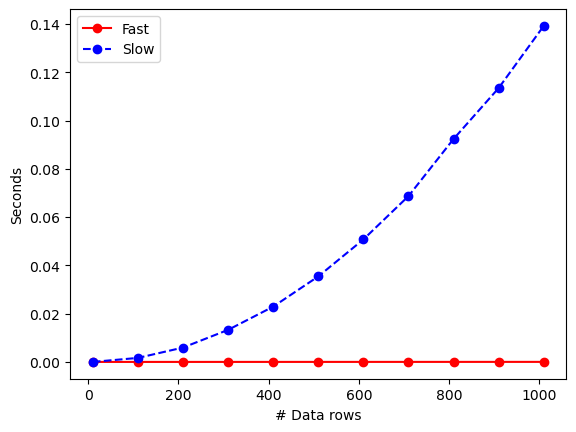

In [10]:
# D3 the slow way
import time
from tqdm import tqdm
fast = True
# Cluster statistics
def D3_slow(C1, C2): # Slow algorithm
    C = np.concatenate([C1, C2], axis=0)
    s = 0.
    
    N1, d = C1.shape
    N2, _ = C2.shape
    N,  _ = C.shape
    
    if fast: # Fast version of the slow algorithm
        C_ = C.reshape(N, 1, d)
        C  = C.reshape(1, N, d)
        D  = (C_ - C).reshape(N*N, 1, d)
        s  = (D @ D.reshape(N*N, d, 1)).sum()
    else: # Slow version of the slow algorithm
        for i in range(N):
            for j in range(N):
                s += np.dot((C[i] - C[j]), (C[i] - C[j]))

    s = s / ((N1 + N2)*(N1 + N2 -1))
    return np.sqrt(s)

# Statistics for fast implementation
LS = lambda C: np.sum(C, axis=0)
SS = lambda C: np.sum(C ** 2)

# TODO implement fast way:
def D3_fast(C1, C2):
    N1, _ = C1.shape
    N2, _ = C2.shape
    LS1, SS1 = LS(C1), SS(C1)
    LS2, SS2 = LS(C2), SS(C2)

    return np.sqrt((2*((N1 + N2)*(SS1 + SS2) - np.dot((LS1 + LS2), (LS1 + LS2)))) / ((N1 + N2)*(N1 + N2 - 1)))    
    return 0 # TODO return DS3


# Generate random samples in two different clusters.
# Check that the two algorithms give the same result.
size = 4
C1 = np.random.randn(size, 2) * 0.5 
C2 = np.random.randn(size, 2) * 0.5 + 2
assert np.allclose(D3_slow(C1, C2), D3_fast(C1, C2))

## TEST running time for the two algorithms
repeats     = 20   # Average running time over `repeats` time.
size_from   = 10   # Data set size from
size_to     = 1010  # Dataset size to
size_step   = 100   # Step size
data_sizes  = range(size_from, size_to + 1, size_step) # Test sizes

def test(fn):
    times = []
    results = []
    
    for size in data_sizes:
        C1 = np.random.randn(size, 2) * 0.5 
        C2 = np.random.randn(size, 2) * 0.5 + 2
        
        t0 = time.time()
        for _ in range(repeats): 
              print(f'\rSize {size}: {1+_}/{repeats}', end="")
              t = fn(C1, C2)
        td = time.time() - t0
        print(f"\rSize {size}: \t{td / repeats:.6f} secs.")
        results.append(t)
        times.append(td / repeats)
    return times, results

print("Testing slow algorithm")
slows, slow_res = test(D3_slow)
print("Testing fast algorithm")
fasts, fast_res = test(D3_fast)

print("\n|  i  | %-9s | %-9s |" % ('Fast', 'Slow'))
print("-"*31)
for i, st, sr, ft, fr in zip(data_sizes, slows, slow_res, fasts, fast_res):
    print("| %3i | %9.5f | %9.5f |" % (i, ft, st))

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1)
ax.plot(data_sizes, fasts, 'r-o', label="Fast")
ax.plot(data_sizes, slows, 'b--o', label="Slow")
ax.set_ylabel('Seconds')
ax.set_xlabel('# Data rows')
ax.legend()

#### References:
[1] Zhang, T., Ramakrishnan, R. and Livny, M., 1996. BIRCH: an efficient data clustering method for very large databases. ACM Sigmod Record, 25(2), pp.103-114.